In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from network import solve_ode_network, signal_processing_on_hopf, smoothening_envelope, compute_envelope_fc
from utility import plot_x_values
from scipy.stats import pearsonr
from scipy.signal import hilbert, butter, filtfilt
from scipy.signal import hilbert, hilbert2, savgol_filter, find_peaks
from scipy.interpolate import interp1d

In [2]:
# Function to calculate Kuramoto order parameter R(t) and metastability
def calculate_kuramoto_and_metastability(analytical_x):
    # Calculate the instantaneous phase φk(t) for each brain region
    instantaneous_phase = np.angle(analytical_x)

    # Calculate the Kuramoto order parameter R(t) over time
    R_t = np.abs(np.sum(np.exp(1j * instantaneous_phase), axis=1))/78

    # Calculate metastability as the standard deviation of the Kuramoto order parameter
    metastability = np.std(R_t)
    
    return R_t, metastability

In [30]:
beta = 3 # noise level
dt = 0.001
a = 0
f=12
omega = 2*np.pi*f
num_steps = 10000
G = 0.5

mat = loadmat('../references/AAL78/C78.mat')
C = mat['C']
alpha = 0.2
C = alpha * C / np.max(C)

Processing signal for frequency 12Hz...


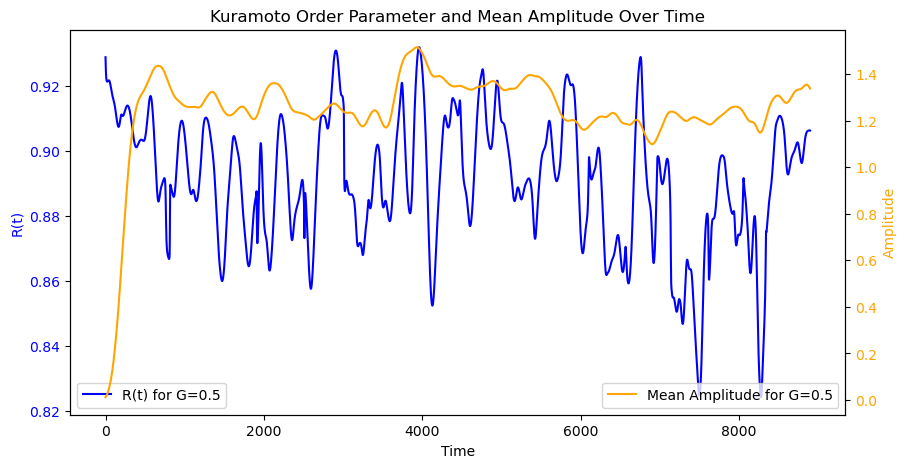

In [28]:
x_values, _ = solve_ode_network(num_steps, dt, a, omega, beta, C, G)

signal = x_values

_, _, analytical_x, _, smoothened_env_x, _ = signal_processing_on_hopf(signal, C, dt, f, G)
R_t, _ = calculate_kuramoto_and_metastability(analytical_x)
mean_amplitude_x = np.mean(smoothened_env_x, axis=1)

# Create a figure and a first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot R_t (Kuramoto Order Parameter) on the first axis (ax1) in blue
ax1.plot(R_t[100:9000], label=f'R(t) for G={G}', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('R(t)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower left')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot mean_amplitude_x on the second axis (ax2) in orange
ax2.plot(mean_amplitude_x[100:9000], label=f'Mean Amplitude for G={G}', color='orange')
ax2.set_ylabel('Amplitude', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='lower right')

# Title of the combined plot
plt.title('Kuramoto Order Parameter and Mean Amplitude Over Time')

# Show the plot with two y-axes
plt.show()

### Metstability vs. Coupling Strength

In [31]:
# Vary the coupling strength G from 0 to 1 with 20 points
f=12
omega = 2 * np.pi * f
G_values = np.linspace(0, 1, 10)
metastabilities = []

# Calculate metastability for varying G and plot the metastability
for G in G_values:
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
    _, _, analytical_x, _, _, _ = signal_processing_on_hopf(x_values, C, dt, f, G)
    _, metastability = calculate_kuramoto_and_metastability(analytical_x)
    metastabilities.append(metastability)

# Plot metastability over G values
plt.figure(figsize=(10, 5))
plt.plot(G_values, metastabilities, marker='o')
plt.title('Metastability for Varying Coupling Strength G')
plt.xlabel('G (Coupling Strength)')
plt.ylabel('Metastability (Standard Deviation of R(t))')
plt.grid(True)
plt.show()

Solving ODE Network...
Processing signal for frequency 12Hz...
Solving ODE Network...


KeyboardInterrupt: 

### Metastability vs carrier frequencies

In [ ]:
# Vary the frequencies from 4 to 28 with 12 points
G=0.5
f_values = np.linspace(4, 28, 12)
metastabilities = []

# Calculate metastability for varying G and plot the metastability
for f in f_values:
    omega = 2 * np.pi * f
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
    _, _, analytical_x, _, _, _ = signal_processing_on_hopf(x_values, C, dt, f, G)
    _, metastability = calculate_kuramoto_and_metastability(analytical_x)
    metastabilities.append(metastability)

# Plot metastability over G values
plt.figure(figsize=(10, 5))
plt.plot(f_values, metastabilities, marker='o')
plt.title('Metastability for Varying Carrier frequency f')
plt.xlabel('f (Carrier Frequency)')
plt.ylabel('Metastability (Standard Deviation of R(t))')
plt.grid(True)
plt.show()